In [1]:
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import warnings
from imblearn.combine import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report
#from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

# 한글 설정
import matplotlib.font_manager as fm

# font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
# ttf 폰트 전체개수
# print(len(font_list))
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Gothic' in f.name]

font_path = 'C:\\WINDOWS\\Fonts\\malgunsl.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
font_name = font_prop.get_name()

rc('font', family=font_name)

In [2]:
test = pd.read_csv('D:\python\연습\store/test.csv',encoding='CP949')
test.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   총구매액       5000 non-null   int64  
 2   구매건수       5000 non-null   int64  
 3   평균구매가격     5000 non-null   int64  
 4   평균할부개월수    5000 non-null   float64
 5   구매브랜드종류    5000 non-null   int64  
 6   내점일수       5000 non-null   int64  
 7   수입상품_구매비율  5000 non-null   float64
 8   주말방문비율     5000 non-null   float64
 9   가을_구매건수    4052 non-null   float64
 10  겨울_구매건수    4089 non-null   float64
 11  봄_구매건수     4319 non-null   float64
 12  여름_구매건수    4009 non-null   float64
 13  아침_구매건수    3608 non-null   float64
 14  저녁_구매건수    3975 non-null   float64
 15  점심_구매건수    4861 non-null   float64
 16  주구매코너      5000 non-null   object 
dtypes: float64(10), int64(6), object(1)
memory usage: 664.2+ KB


#### 데이터의 행수, 열수를 확인

In [4]:
test.shape

(5000, 17)

#### 데이터 형을 확인

In [5]:
test.dtypes

custid         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너         object
dtype: object

#### 결손값, 결측치, 결측값 확인

In [6]:
test.isnull().sum().sum()

6087

#### 데이터행별 결손값의 개수가 많은 순서로 정렬

In [7]:
test.isnull().sum(axis=0).sort_values(ascending=False)

아침_구매건수      1392
저녁_구매건수      1025
여름_구매건수       991
가을_구매건수       948
겨울_구매건수       911
봄_구매건수        681
점심_구매건수       139
주구매코너           0
평균할부개월수         0
총구매액            0
구매건수            0
평균구매가격          0
주말방문비율          0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
custid          0
dtype: int64

#### 데이터형이 수치형인 각종 통계량의 계산

In [8]:
test.describe()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
count,5000.000000,5.000000e+03,5000.000000,5.000000e+03,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,4052.000000,4089.000000,4319.000000,4009.000000,3608.000000,3975.000000,4861.000000
mean,102500.500000,3.441780e+06,34.811400,1.012712e+05,1.90960,17.703400,18.060400,17.448680,38.59578,10.469891,9.895573,10.624682,11.295086,8.595621,9.521258,21.641020
std,1443.520003,4.992757e+06,40.082429,8.359185e+04,0.72939,14.922063,19.313637,18.566486,24.25075,11.749245,11.357972,11.734012,12.038547,13.003838,13.082006,25.838899
min,100001.000000,-6.696500e+04,1.000000,-1.196000e+03,1.00000,1.000000,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,101250.750000,7.183012e+05,10.000000,5.499500e+04,1.40000,7.000000,6.000000,5.100000,22.90000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,6.000000
50%,102500.500000,1.839293e+06,22.000000,8.164500e+04,1.80000,13.000000,12.000000,12.500000,35.00000,7.000000,6.000000,7.000000,7.000000,4.000000,5.000000,13.000000
75%,103750.250000,4.085492e+06,44.000000,1.215162e+05,2.30000,24.000000,23.000000,24.000000,50.00000,13.000000,13.000000,14.000000,15.000000,10.000000,11.000000,27.000000
max,105000.000000,6.440467e+07,474.000000,1.887526e+06,12.00000,147.000000,187.000000,100.000000,100.00000,159.000000,158.000000,164.000000,109.000000,220.000000,227.000000,275.000000


#### 데이터형이 문자열인 각종 통계량의 계산

In [9]:
test.describe(include=[object])

,주구매코너
count,5000
unique,25
top,일반식품
freq,1293


In [10]:
train = pd.read_csv('D:\python\연습\store/train.csv', encoding='CP949')
train.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A


In [11]:
train.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [12]:
train.shape

(5000, 18)

In [13]:
tdf = test.copy()
ndf = train.copy()

In [14]:
tdf['gender'] = ndf['gender']

In [15]:
tdf.head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복,0
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품,0
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠,0


In [16]:
# matplotlib 패키지 한글화하기

In [17]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [18]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

#### 데이터의 시각화

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


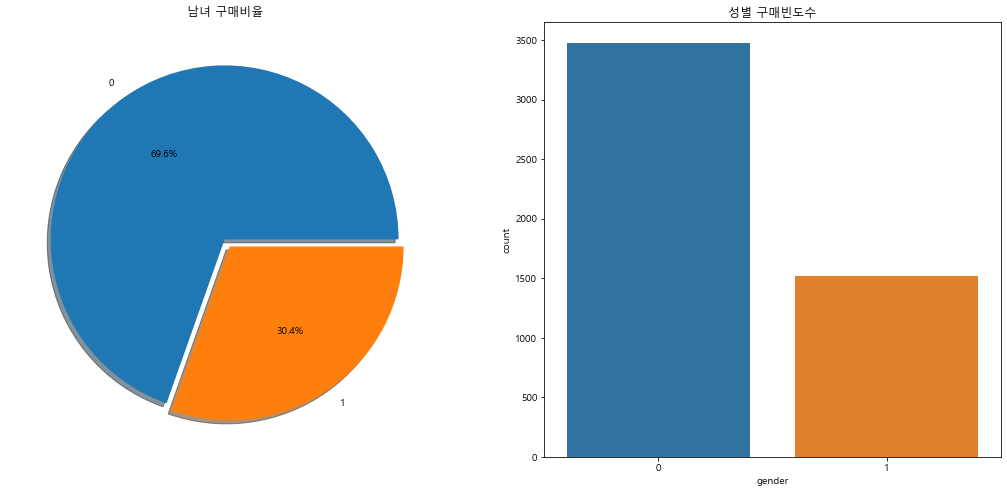

In [19]:
f, ax = plt.subplots(1,2,figsize=(18,8))

# 구매에 대한 남녀 빈도 체크
gender_freq = ndf.gender.value_counts()
gender_freq.plot.pie(explode=[0,0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('남녀 구매비율')
ax[0].set_ylabel('')

# 구매에 대한 남녀 빈도 체크 -> 히스토그램
sns.countplot('gender', data=ndf, ax=ax[1])
ax[1].set_title('성별 구매빈도수')
plt.show()

C:\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


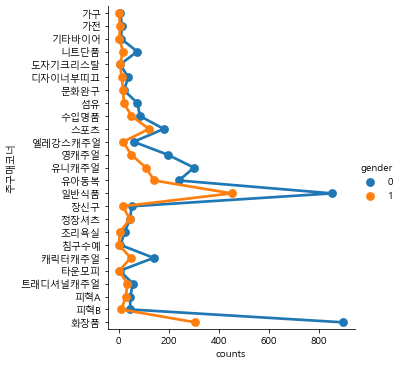

In [20]:
# 남녀별 주구매코너별 구매율
gender_catcnt = ndf.groupby(['gender', '주구매코너'])['custid'].agg('count').to_frame()
df_catecnt = gender_catcnt.reset_index()
df_catecnt.columns = ['gender', '주구매코너', 'counts']

sns.factorplot('counts', '주구매코너', hue='gender', data=df_catecnt)

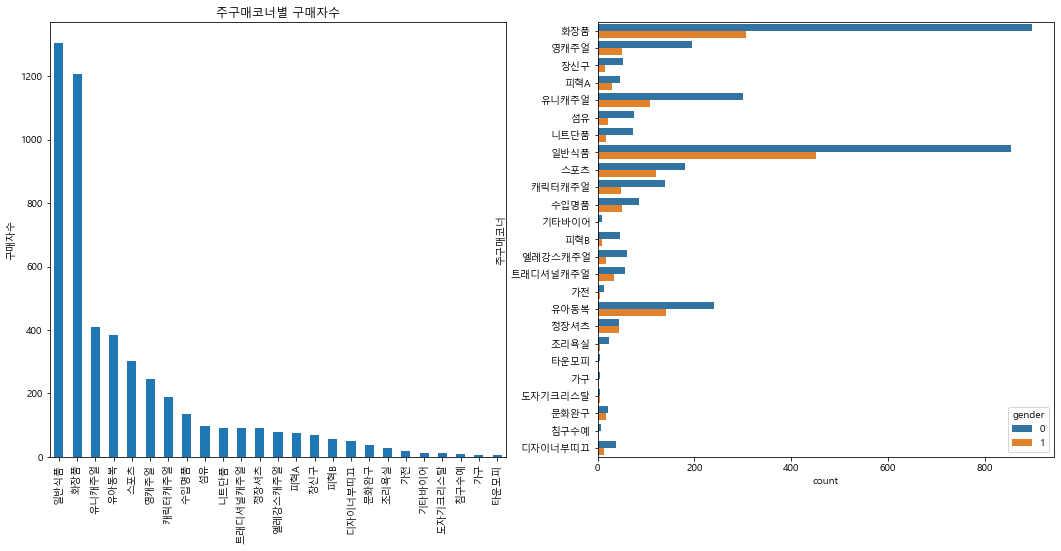

In [21]:
# 일반식품 -> 화장품 순으로 구매자수가 많음
# 여자는 화장품 -> 일반식풉 -> 유니캐주얼 순이고, 남자는 일반식품 -> 화장품 -> 유아동복 순으로 구매함.
f, ax = plt.subplots(1,2, figsize=(18,8))
ndf['주구매코너'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('주구매코너별 구매자수')
ax[0].set_ylabel('구매자수')
sns.countplot(y='주구매코너', hue='gender', data=ndf, ax=ax[1])
plt.show()

In [22]:
pd.crosstab(ndf['주구매코너'], ndf['gender'], margins=True).style.background_gradient(cmap='summer_r')

gender,0,1,All
주구매코너,,,
가구,6,1,7
가전,13,5,18
기타바이어,9,3,12
니트단품,74,17,91
도자기크리스탈,6,5,11
디자이너부띠끄,38,13,51
문화완구,21,17,38
섬유,75,21,96
수입명품,85,51,136


## Missing Values 처리 ##

In [23]:
# 결측값 확인
# input : dataframe 객체
#   checkData : 확인할 데이터
#
# output : feature 별 null 값 건수
def have_missing_value(checkData):
    try:       
        
        data = checkData.isnull().sum();
        
        return data;
    except Exception as e:
        raise e

In [24]:
# 수치형 결측치 처리
# input : dataframe 객체
#   checkData : 확인할 데이터
#   cont       : 수치형 Features
#   imputeValue : 대체할 값  
# output : feature 별 null 값 건수
def Impute_missing_value_numeric(checkData, cont, imputeValue):
    try:
        
        data = checkData.fillna(value=imputeValue, inplace=True)
            
        return data;
    except Exception as e:
        raise e

In [25]:
# 범주형 결측치 One-hot encoding 처리
# input : dataframe 객체
#   checkData : 확인할 데이터
#   cate      : encoding 할 Feature 
# output : feature 별 null 값 건수
def Impute_missing_value_categorical(checkData, cate):
    try:
        
        for i in checkData[cate].dtypes.index:
            
            print("['"+ i +"'].astype('category').cat.categories")
            checkData[i].astype('category').cat.categories
            
            checkData[cate] = checkData[cate].apply(lambda x: x.astype('category').cat.codes)
        
        return  checkData
    except Exception as e:
        raise e

In [26]:
# Tomek links :  언더샘플링(Under-Sampling) : 다수 클래스 데이터에서 일부만 사용함
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
def under_Sampling_DecisionTree(X_train, y_train):
    try:
        XX, yy = TomekLinks().fit_sample(X_train, y_train)
        tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
        tree0.fit(XX, yy)
        y_pred0 = tree0.predict(X_test)

        print(classification_report(y_test, y_pred0))

    except Exception as e:
        raise e

In [27]:
# Smot+Tomek links :  복합샘플링(Combining Over-and Under-Sampling) 
# input : X_train, y_train
#  X_train : 
#  y_train
# output : print
def combining_Sampling_DecisionTree(X_train, y_train):
    try:
        XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

        tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)
        tree3.fit(XX, yy)
        y_pred3 = tree3.predict(X_test)

        print(classification_report(y_test, y_pred3))

    except Exception as e:
        raise e

In [28]:
# Missing Values 확인
ndf_copy = ndf.copy() 
have_missing_value(ndf_copy)

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [29]:
# Feature 정의
# 수치형 Features
cont = ['총구매액','구매건수','평균구매가격','평균할부개월수','내점일수',
       '수입상품_구매비율','주말방문비율', '봄_구매건수', '여름_구매건수',
       '가을_구매건수','겨울_구매건수','아침_구매건수', '점심_구매건수',
       '저녁_구매건수', '구매브랜드종류']
# 범주형 Features
cate = ['주구매코너']
# 비분석 Features : drop
delCols = ['custid']
# target Feature
dfy = 'gender'

In [30]:
ndf

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,NaN,9.0,6.0,NaN,NaN,6.0,9.0,화장품
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,NaN,5.0,4.0,NaN,3.0,NaN,6.0,영캐주얼
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,NaN,10.0,11.0,15.0,장신구
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,NaN,NaN,18.0,10.0,화장품
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,피혁A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,49952,1,6666517,93,71683,1.8,27,39,10.8,43.6,13.0,33.0,14.0,33.0,8.0,41.0,44.0,일반식품
4996,49954,0,3112100,17,183065,3.6,10,13,29.4,38.5,4.0,6.0,6.0,1.0,3.0,NaN,14.0,디자이너부띠끄
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,NaN,21.0,화장품
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,NaN,2.0,11.0,피혁A


In [31]:
# 대체값 0으로 수치형 Feature 결측치 처리 : 
Impute_missing_value_numeric(ndf, cont, 0)
have_missing_value(ndf)

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [32]:
# 범주형 결측치 One-hot encoding 처리
dataP =Impute_missing_value_categorical(ndf, cate)

['주구매코너'].astype('category').cat.categories


In [33]:
# 학습용 데이터 확인
dataP.tail(3)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4997,49957,1,5852482,37,158175,2.6,14,21,40.5,19.0,12.0,6.0,6.0,13.0,16.0,0.0,21.0,24
4998,49975,1,654498,13,50346,2.5,10,7,7.7,14.3,6.0,4.0,2.0,1.0,0.0,2.0,11.0,22
4999,49993,1,2554723,32,79835,1.7,9,26,21.9,34.6,6.0,5.0,10.0,11.0,8.0,5.0,19.0,14


In [34]:
tdf['gender'].value_counts(normalize=True)

0    0.6958
1    0.3042
Name: gender, dtype: float64

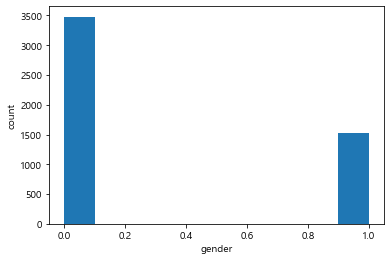

In [35]:
# gender의 히스토그램을 작성

plt.hist(tdf['gender'])
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

In [36]:
# matplotlib 패키지 한글화하기

In [37]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [38]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다. 

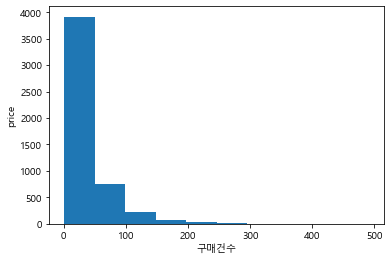

In [39]:
# 구매건수의 히스토그램을 작성

plt.hist(ndf['구매건수'])
plt.xlabel('구매건수')
plt.ylabel('price')
plt.show()

In [40]:
ndf['구매건수'].value_counts(normalize=True)

3      0.0314
4      0.0308
5      0.0292
9      0.0292
2      0.0280
        ...  
269    0.0002
353    0.0002
389    0.0002
417    0.0002
491    0.0002
Name: 구매건수, Length: 223, dtype: float64

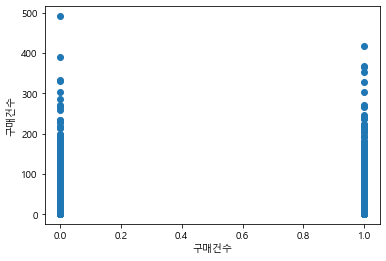

In [41]:
# gender와 구매건수의 산포도를 작성
plt.scatter(ndf['gender'], ndf['구매건수'])

plt.xlabel('구매건수')
plt.ylabel('구매건수')
plt.show()

In [42]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


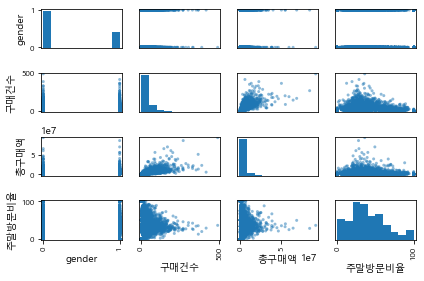

In [43]:
# 산포도행렬의 작성
pd.plotting.scatter_matrix(ndf[['gender', '구매건수', '총구매액', 
                                '주말방문비율']])
plt.tight_layout()
plt.show()

In [44]:
# 주구매코너의 레이블
주구매코너_label = ndf['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .index
# 주구매코너의 값
주구매코너_vals = ndf['주구매코너']\
        .value_counts(ascending=False, normalize=True)\
        .values

In [45]:
주구매코너_label

Int64Index([14, 24, 12, 13,  9, 11, 19,  8,  7, 21,  3, 16, 10, 22, 15, 23,  5,
             6, 17,  1,  2,  4, 18,  0, 20],
           dtype='int64')

In [46]:
주구매코너_vals

array([0.2612, 0.2412, 0.082 , 0.0766, 0.0602, 0.0492, 0.0376, 0.0272,
       0.0192, 0.0182, 0.0182, 0.018 , 0.0156, 0.015 , 0.0136, 0.0112,
       0.0102, 0.0076, 0.0056, 0.0036, 0.0024, 0.0022, 0.0016, 0.0014,
       0.0012])

In [47]:
ndf.value_counts(ascending=False, normalize=True).index

MultiIndex([(49993, 1,  2554723,  32,  79835, 1.7,  9, 26,  21.9,  34.6, ...),
            (17006, 0,  7637516,  46, 166033, 1.7, 34, 31,   8.7,  29.0, ...),
            (16942, 1,  3775002,  31, 121774, 2.1, 21, 24,  29.0,  33.3, ...),
            (16945, 1,  2511100,  19, 132163, 1.8, 15,  8,  10.5,  62.5, ...),
            (16954, 0,  1053000,   7, 150429, 2.9,  7,  4,  14.3,  75.0, ...),
            (16955, 0,   130800,   4,  32700, 1.0,  4,  3,  25.0,   0.0, ...),
            (16965, 0,  2896904,  30,  96563, 2.5, 24, 15,  30.0,  60.0, ...),
            (16974, 0,  1185200,  10, 118520, 2.4,  7,  6,   0.0,  16.7, ...),
            (16976, 0, 10167507, 131,  77615, 2.1, 68, 60,   1.5,  23.3, ...),
            (17025, 1,  1092000,  18,  60667, 1.1, 15, 11,   5.6,  36.4, ...),
            ...
            (33667, 0,  2104037,  43,  48931, 1.7, 18, 21,  16.3,  52.4, ...),
            (33668, 0, 15662125, 130, 120478, 2.1, 49, 41,  10.0,  24.4, ...),
            (33671, 0,   315000,   2

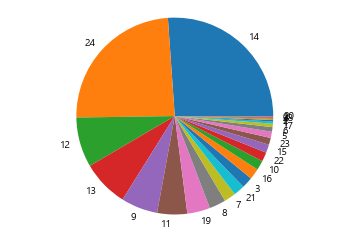

In [48]:
# 주구매코너의 원그래프를 작성
plt.pie(주구매코너_vals, labels=주구매코너_label)
plt.axis('equal') 
plt.show()

In [49]:
corr = ndf.corr()
corr

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
custid,1.000000,0.262472,0.217251,0.218914,0.117939,0.093048,0.154303,0.212969,-0.017958,-0.162393,0.187350,0.164901,0.184422,0.236324,0.199936,-0.001832,0.247271,-0.131943
gender,0.262472,1.000000,0.099137,0.094022,0.072181,-0.020066,0.083988,0.084255,-0.021294,0.020457,0.088600,0.065261,0.076116,0.101900,0.127779,-0.021618,0.097237,-0.039270
총구매액,0.217251,0.099137,1.000000,0.712183,0.376395,0.137335,0.714774,0.617210,-0.048053,-0.048515,0.657523,0.620446,0.635757,0.619743,0.456158,0.398494,0.709572,-0.141735
구매건수,0.218914,0.094022,0.712183,1.000000,-0.057376,-0.037878,0.869075,0.942115,-0.210022,-0.096558,0.896969,0.879652,0.895580,0.883784,0.672721,0.643764,0.945027,-0.143826
평균구매가격,0.117939,0.072181,0.376395,-0.057376,1.000000,0.407556,0.002931,-0.091136,0.189608,0.036426,-0.036019,-0.052918,-0.048857,-0.064851,-0.040362,-0.092749,-0.028726,-0.044333
평균할부개월수,0.093048,-0.020066,0.137335,-0.037878,0.407556,1.000000,-0.002074,-0.076343,0.097727,-0.001625,-0.018789,-0.039526,-0.033855,-0.041831,-0.047450,-0.051170,-0.014389,-0.021258
구매브랜드종류,0.154303,0.083988,0.714774,0.869075,0.002931,-0.002074,1.000000,0.780303,-0.234547,-0.080674,0.777740,0.774681,0.784562,0.755035,0.582657,0.578552,0.813712,-0.166345
내점일수,0.212969,0.084255,0.617210,0.942115,-0.091136,-0.076343,0.780303,1.000000,-0.225363,-0.114795,0.843133,0.836375,0.843763,0.827751,0.638138,0.634809,0.875888,-0.136688
수입상품_구매비율,-0.017958,-0.021294,-0.048053,-0.210022,0.189608,0.097727,-0.234547,-0.225363,1.000000,0.016123,-0.183411,-0.185994,-0.193382,-0.184013,-0.133133,-0.170649,-0.186310,0.277087
주말방문비율,-0.162393,0.020457,-0.048515,-0.096558,0.036426,-0.001625,-0.080674,-0.114795,0.016123,1.000000,-0.084014,-0.071125,-0.093424,-0.092989,-0.113193,-0.006852,-0.094814,0.064942


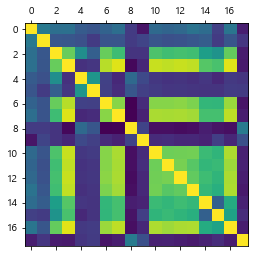

In [50]:
plt.matshow(corr)

In [51]:
corr.gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.127779
여름_구매건수      0.101900
총구매액         0.099137
점심_구매건수      0.097237
구매건수         0.094022
가을_구매건수      0.088600
내점일수         0.084255
구매브랜드종류      0.083988
봄_구매건수       0.076116
평균구매가격       0.072181
겨울_구매건수      0.065261
주말방문비율       0.020457
평균할부개월수     -0.020066
수입상품_구매비율   -0.021294
저녁_구매건수     -0.021618
주구매코너       -0.039270
Name: gender, dtype: float64

In [52]:
ndf.gender.value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [53]:
ndf.isnull().sum().sum()

0

In [54]:
ndf['가을_구매건수'].fillna(round(ndf['가을_구매건수'].mean(),0) , inplace = True)
ndf['겨울_구매건수'].fillna(round(ndf['겨울_구매건수'].mean(),0) , inplace = True)
ndf['봄_구매건수'].fillna(round(ndf['봄_구매건수'].mean(),0) , inplace = True)
ndf['여름_구매건수'].fillna(round(ndf['여름_구매건수'].mean(),0) , inplace = True)
ndf['아침_구매건수'].fillna(round(ndf['아침_구매건수'].mean(),0) , inplace = True)
ndf['저녁_구매건수'].fillna(round(ndf['저녁_구매건수'].mean(),0) , inplace = True)
ndf['점심_구매건수'].fillna(round(ndf['점심_구매건수'].mean(),0) , inplace = True)
ndf.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [55]:
ndf.isnull().sum().sum()

0

In [56]:
tdf.shape

(5000, 18)

In [57]:
ndf.shape

(5000, 18)

In [58]:
obj = ['주구매코너']

In [59]:
ndf[obj].head()

,주구매코너
0,24
1,11
2,15
3,24
4,22


In [60]:
ndf[obj] = tdf[obj].apply(lambda x: x.astype('category').cat.codes)

In [61]:
ndf[obj].head()

,주구매코너
0,15
1,13
2,13
3,8
4,9


### 계절별, 시간별 컬럼 각각 합치기

In [62]:
drop_cols = ['봄_구매건수','여름_구매건수','겨울_구매건수','가을_구매건수','점심_구매건수','저녁_구매건수','아침_구매건수']

In [63]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [64]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(tdf[drop_cols])

SimpleImputer(strategy='most_frequent')

In [65]:
from sklearn.impute import SimpleImputer
imputer_drop_cols = SimpleImputer(strategy="most_frequent")  
imputer_drop_cols.fit(ndf[drop_cols])

SimpleImputer(strategy='most_frequent')

In [66]:
x = imputer_drop_cols.transform(tdf[drop_cols])
x

array([[ 7.,  9.,  4., ..., 11.,  1., 13.],
       [10.,  8.,  8., ..., 25., 10.,  4.],
       [ 3.,  6.,  7., ..., 18.,  1.,  3.],
       ...,
       [ 6.,  1.,  1., ..., 12.,  0.,  0.],
       [ 4.,  3.,  7., ...,  8.,  4.,  2.],
       [ 9., 24., 20., ..., 61.,  4., 11.]])

In [67]:
y = imputer_drop_cols.transform(ndf[drop_cols])
y

array([[ 6.,  0.,  9., ...,  9.,  6.,  0.],
       [ 4.,  0.,  5., ...,  6.,  0.,  3.],
       [12.,  0., 17., ..., 15., 11., 10.],
       ...,
       [ 6., 13.,  6., ..., 21.,  0., 16.],
       [ 2.,  1.,  4., ..., 11.,  2.,  0.],
       [10., 11.,  5., ..., 19.,  5.,  8.]])

In [68]:
ndf[drop_cols] = x
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   custid     5000 non-null   int64  
 1   gender     5000 non-null   int64  
 2   총구매액       5000 non-null   int64  
 3   구매건수       5000 non-null   int64  
 4   평균구매가격     5000 non-null   int64  
 5   평균할부개월수    5000 non-null   float64
 6   구매브랜드종류    5000 non-null   int64  
 7   내점일수       5000 non-null   int64  
 8   수입상품_구매비율  5000 non-null   float64
 9   주말방문비율     5000 non-null   float64
 10  가을_구매건수    5000 non-null   float64
 11  겨울_구매건수    5000 non-null   float64
 12  봄_구매건수     5000 non-null   float64
 13  여름_구매건수    5000 non-null   float64
 14  아침_구매건수    5000 non-null   float64
 15  저녁_구매건수    5000 non-null   float64
 16  점심_구매건수    5000 non-null   float64
 17  주구매코너      5000 non-null   int8   
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [69]:
dfX = ndf.drop(['gender','custid'], axis=1) 
dfy = ndf['gender']

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [72]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [73]:
print("Mean: {:.3f}\nStd: {:.3f}\nMin: {:.3f}\nMax: {:.3f}".format(
    scores.mean(), scores.std(), scores.min(), scores.max()))

Mean: 0.696
Std: 0.001
Min: 0.695
Max: 0.697


In [74]:
ndf['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [75]:
from imblearn.under_sampling import *

In [76]:
from imblearn.combine import SMOTETomek

In [77]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [79]:
X_train, X_test, y_train, y_test = train_test_split(dfX, 
                                                    dfy, test_size=0.25, random_state=0)

In [80]:
tree3 = DecisionTreeClassifier(max_depth=4, random_state=0)

tree3.fit(X_train, y_train)
y_pred3 = tree3.predict(X_test)

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       883
           1       0.40      0.01      0.01       367

    accuracy                           0.71      1250
   macro avg       0.55      0.50      0.42      1250
weighted avg       0.62      0.71      0.59      1250



In [81]:
from imblearn.under_sampling import TomekLinks

In [82]:
XX, yy = TomekLinks().fit_sample(X_train, y_train)
tree0 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree0.fit(XX, yy)
y_pred0 = tree0.predict(X_test)
print(classification_report(y_test, y_pred0))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       883
           1       0.38      0.28      0.32       367

    accuracy                           0.65      1250
   macro avg       0.56      0.55      0.55      1250
weighted avg       0.63      0.65      0.64      1250



In [83]:
XX, yy = SMOTETomek(random_state=0).fit_sample(X_train, y_train)

In [84]:
tree3.score(X_test,y_test)

0.7056

In [85]:
from sklearn.dummy import DummyClassifier
print(y_test.value_counts())
DummyClassifier(strategy='most_frequent').fit(X_train, y_train).score(X_test, y_test)

0    883
1    367
Name: gender, dtype: int64


0.7064

# xgboost 전개 추가 부분


In [86]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [87]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [88]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [89]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [90]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[14:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.67646	eval-logloss:0.67651
[1]	train-logloss:0.66273	eval-logloss:0.66341
[2]	train-logloss:0.65161	eval-logloss:0.65244
[3]	train-logloss:0.64230	eval-logloss:0.64376
[4]	train-logloss:0.63459	eval-logloss:0.63635
[5]	train-logloss:0.62823	eval-logloss:0.63045
[6]	train-logloss:0.62271	eval-logloss:0.62526
[7]	train-logloss:0.61831	eval-logloss:0.62104
[8]	train-logloss:0.61421	eval-logloss:0.61738
[9]	train-logloss:0.61102	eval-logloss:0.61474
[10]	train-logloss:0.60765	eval-logloss:0.61235
[11]	train-logloss:0.60514	eval-logloss:0.61065
[12]	train-logloss:0.60299	eval-logloss:0

[162]	train-logloss:0.51604	eval-logloss:0.61418
[163]	train-logloss:0.51574	eval-logloss:0.61443
[164]	train-logloss:0.51521	eval-logloss:0.61438
[165]	train-logloss:0.51480	eval-logloss:0.61458
[166]	train-logloss:0.51417	eval-logloss:0.61479
[167]	train-logloss:0.51351	eval-logloss:0.61440
[168]	train-logloss:0.51312	eval-logloss:0.61409
[169]	train-logloss:0.51300	eval-logloss:0.61404
[170]	train-logloss:0.51284	eval-logloss:0.61414
[171]	train-logloss:0.51229	eval-logloss:0.61422
[172]	train-logloss:0.51173	eval-logloss:0.61460
[173]	train-logloss:0.51110	eval-logloss:0.61496
[174]	train-logloss:0.51081	eval-logloss:0.61511
[175]	train-logloss:0.51075	eval-logloss:0.61525
[176]	train-logloss:0.51066	eval-logloss:0.61540
[177]	train-logloss:0.51006	eval-logloss:0.61526
[178]	train-logloss:0.50953	eval-logloss:0.61552
[179]	train-logloss:0.50940	eval-logloss:0.61552
[180]	train-logloss:0.50888	eval-logloss:0.61549
[181]	train-logloss:0.50852	eval-logloss:0.61518
[182]	train-logloss:

[330]	train-logloss:0.45281	eval-logloss:0.62852
[331]	train-logloss:0.45273	eval-logloss:0.62850
[332]	train-logloss:0.45257	eval-logloss:0.62833
[333]	train-logloss:0.45251	eval-logloss:0.62844
[334]	train-logloss:0.45207	eval-logloss:0.62845
[335]	train-logloss:0.45165	eval-logloss:0.62826
[336]	train-logloss:0.45142	eval-logloss:0.62831
[337]	train-logloss:0.45099	eval-logloss:0.62823
[338]	train-logloss:0.45053	eval-logloss:0.62828
[339]	train-logloss:0.45024	eval-logloss:0.62826
[340]	train-logloss:0.44986	eval-logloss:0.62857
[341]	train-logloss:0.44947	eval-logloss:0.62858
[342]	train-logloss:0.44912	eval-logloss:0.62840
[343]	train-logloss:0.44881	eval-logloss:0.62841
[344]	train-logloss:0.44841	eval-logloss:0.62850
[345]	train-logloss:0.44797	eval-logloss:0.62847
[346]	train-logloss:0.44760	eval-logloss:0.62811
[347]	train-logloss:0.44729	eval-logloss:0.62845
[348]	train-logloss:0.44689	eval-logloss:0.62885
[349]	train-logloss:0.44648	eval-logloss:0.62888
[350]	train-logloss:

In [91]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.352 0.339 0.509 0.297 0.268 0.239 0.218 0.272 0.33  0.213]


In [92]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [93]:
get_clf_eval(y_test, preds)

오차행렬
[[821  62]
 [333  34]]
정확도: 0.6840, 정밀도: 0.3542, 재현율: 0.0926


In [94]:
XX.columns

Index(['총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수', '수입상품_구매비율',
       '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수', '아침_구매건수',
       '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [95]:
col = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n','o','p']

In [96]:
XX.head()

,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,404285,3,134762,2.3,3,2,33.3,0.0,3.0,1.0,25.0,9.0,1.0,13.0,24.0,24
1,2407157,32,75224,1.7,22,17,9.4,52.9,54.0,58.0,70.0,62.0,38.0,0.0,206.0,14
2,4664283,78,59798,1.8,24,22,1.3,45.5,9.0,8.0,2.0,2.0,2.0,7.0,12.0,14
3,3299200,11,299927,1.9,9,3,45.5,33.3,7.0,4.0,2.0,8.0,3.0,1.0,17.0,8
4,555480,5,111096,2.6,4,4,20.0,75.0,4.0,6.0,6.0,9.0,2.0,3.0,20.0,8


In [97]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(XX, yy, feature_name=col, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals, verbose=True)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.681429	valid_0's binary_logloss: 0.681429
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.672551	valid_0's binary_logloss: 0.672551
[3]	valid_0's binary_logloss: 0.667095	valid_0's binary_logloss: 0.667095
[4]	valid_0's binary_logloss: 0.661459	valid_0's binary_logloss: 0.661459
[5]	valid_0's binary_logloss: 0.656696	valid_0's binary_logloss: 0.656696
[6]	valid_0's binary_logloss: 0.652668	valid_0's binary_logloss: 0.652668
[7]	valid_0's binary_logloss: 0.649838	valid_0's binary_logloss: 0.649838
[8]	valid_0's binary_logloss: 0.647766	valid_0's binary_logloss: 0.647766
[9]	valid_0's binary_logloss: 0.646374	valid_0's binary_logloss: 0.646374
[10]	valid_0's binary_logloss: 0.645413	valid_0's binary_logloss: 0.645413
[11]	valid_0's binary_logloss: 0.645613	valid_0's binary_logloss: 0.645613
[12]	valid_0's binary_logloss: 0.644137	valid_0's binary_logloss: 0.644137
[13]	valid_0's binary_logloss: 0.644324	valid_

In [98]:
get_clf_eval(y_test, preds)

오차행렬
[[821  62]
 [333  34]]
정확도: 0.6840, 정밀도: 0.3542, 재현율: 0.0926


# Features engineering

In [99]:
# 학습용 데이터에 '코너별구매건' 컬럼 추가

dt0 = tdf.groupby(['주구매코너'])['구매건수'].agg(sum)   
df0 = dt0.to_frame().reset_index()
df0.columns = ['주구매코너', '코너별구매건']
#df0.head(3)
tdf_ = pd.merge(tdf, df0, on='주구매코너')
# dataP_.head()
print(tdf_[(tdf_['주구매코너']==1)].groupby(['gender'])['총구매액'].agg(sum))
print(tdf_[(tdf_['주구매코너']==1)].groupby(['gender'])['구매건수'].agg(sum))
tdf_.head()

Series([], Name: 총구매액, dtype: int64)
Series([], Name: 구매건수, dtype: int64)


,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0,1315
1,100092,2973500,38,78250,4.2,20,16,7.9,43.8,10.0,10.0,13.0,5.0,9.0,3.0,26.0,장신구,0,1315
2,100130,3633456,41,88621,3.2,27,16,2.4,43.8,7.0,17.0,4.0,13.0,1.0,27.0,13.0,장신구,0,1315
3,100170,1536790,8,192099,2.5,8,5,12.5,0.0,2.0,3.0,2.0,1.0,NaN,NaN,8.0,장신구,1,1315
4,100274,1101000,8,137625,5.9,5,5,25.0,0.0,NaN,3.0,5.0,NaN,3.0,NaN,5.0,장신구,0,1315


In [100]:
# 건수 Feature들을 최소단위 정보인 구매건당 구매액로 변경
def createFeatures(df_p):
    df_p['아침구매액'] = np.round(df_p['총구매액']*(df_p['아침_구매건수'] /df_p['구매건수'] ), 3)
    df_p['점심구매액'] = np.round(df_p['총구매액']*(df_p['점심_구매건수'] /df_p['구매건수'] ), 3)
    df_p['저녁구매액'] = np.round(df_p['총구매액']*(df_p['저녁_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['봄구매액']   = np.round(df_p['총구매액']*(df_p['봄_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['여름구매액'] = np.round(df_p['총구매액']*(df_p['여름_구매건수'] /df_p['구매건수'] ), 3) 
    df_p['가을구매액'] = np.round(df_p['총구매액']*(df_p['가을_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['겨울구매액'] = np.round(df_p['총구매액']*(df_p['겨울_구매건수'] /df_p['구매건수'] ), 3)  
    df_p['내점구매율'] = np.round(df_p['구매건수'] /df_p['내점일수'], 3)

def dropFeatures(df_p):
    drop_col = ['아침_구매건수', '점심_구매건수', '저녁_구매건수', '총구매액', '구매건수',
         '봄_구매건수', '여름_구매건수', '가을_구매건수', '겨울_구매건수', '내점일수'] 
    
    return df_p.drop(drop_cols, axis=1)

createFeatures(tdf_)
tdff = dropFeatures(tdf_) 
tdff[(tdff['주구매코너']==2)].head()

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,주구매코너,gender,코너별구매건,아침구매액,점심구매액,저녁구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율


In [101]:
import seaborn as sns

In [102]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

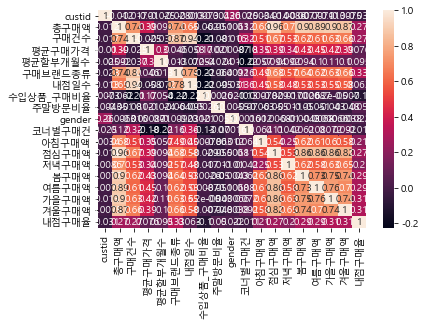

In [103]:
sns.heatmap(tdff.corr(), annot=True)

In [104]:
dataPT = tdff.copy()
dataPD = dataPT.drop(['주말방문비율', '저녁구매액', '평균할부개월수','수입상품_구매비율','주구매코너'], axis=1)

dfy = dataPD['gender']
dfX = dataPD.drop('gender', axis=1)
dfX.tail(2)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4998,104474,1605900,15,107060,15,10,319,107060.0,1284720.0,428240.0,321180.0,749420.0,107060.0,1.5
4999,104752,509000,8,63625,8,4,319,NaN,381750.0,254500.0,254500.0,NaN,NaN,2.0


In [105]:
dfX.shape

(5000, 14)

In [106]:
def drawSMOTETomek(X_org, y_org, X_pca, y_resampled, title1, title2, xlim, ylim, xticks, yticks):
    # Two subplots, unpack the axes array immediately
    f, (ax1, ax2) = plt.subplots(1,2,figsize=(18,8))

    c0 = ax1.scatter(X_org[y_org == 0, 0], X_org[y_org == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax1.scatter(X_org[y_org == 1, 0], X_org[y_org == 1, 1], label="Class #1", alpha=0.5)
    ax1.set_title(title1)

    ax2.scatter(X_pca[y_resampled == 0, 0], X_pca[y_resampled == 0, 1], label="Class #0", alpha=0.5)
    ax2.scatter(X_pca[y_resampled == 1, 0], X_pca[y_resampled == 1, 1], label="Class #1", alpha=0.5)
    ax2.set_title(title2)

    # make nice plotting
    for ax in (ax1, ax2):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.spines['left'].set_position(('outward', 10))
        ax.spines['bottom'].set_position(('outward', 10))
        ax.set_xlim(xlim)      # [-1, 10]
        ax.set_ylim(ylim)      # [-5, 20]
        ax.set_xticks(xticks)  # range(-1, 10)
        ax.set_yticks(yticks)  # range(-5, 20)

    plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.)
    plt.tight_layout(pad=3)
    plt.show()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.25, random_state=0)

In [108]:
X_train.columns

Index(['custid', '총구매액', '구매건수', '평균구매가격', '구매브랜드종류', '내점일수', '코너별구매건',
       '아침구매액', '점심구매액', '봄구매액', '여름구매액', '가을구매액', '겨울구매액', '내점구매율'],
      dtype='object')

In [109]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3750 entries, 4154 to 2732
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   custid   3750 non-null   int64  
 1   총구매액     3750 non-null   int64  
 2   구매건수     3750 non-null   int64  
 3   평균구매가격   3750 non-null   int64  
 4   구매브랜드종류  3750 non-null   int64  
 5   내점일수     3750 non-null   int64  
 6   코너별구매건   3750 non-null   int64  
 7   아침구매액    2690 non-null   float64
 8   점심구매액    3646 non-null   float64
 9   봄구매액     3232 non-null   float64
 10  여름구매액    2992 non-null   float64
 11  가을구매액    3026 non-null   float64
 12  겨울구매액    3059 non-null   float64
 13  내점구매율    3750 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 439.5 KB


In [110]:
X_train.head(2)

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,코너별구매건,아침구매액,점심구매액,봄구매액,여름구매액,가을구매액,겨울구매액,내점구매율
4154,101809,368000,5,73600,4,3,11500,NaN,147200.000,220800.000,73600.000,NaN,73600.000,1.667
4820,102483,4532150,26,174313,14,12,798,522940.385,3486269.231,871567.308,1045880.769,697253.846,1917448.077,2.167


In [111]:
xCol = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k','l','m','n']

In [112]:
lgbm_wrapper = LGBMClassifier(nestimators=400)
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, feature_name=xCol, early_stopping_rounds=100, 
                 eval_metric="logloss", eval_set=evals)
pred = lgbm_wrapper.predict(X_test)

[1]	valid_0's binary_logloss: 0.606267	valid_0's binary_logloss: 0.606267
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.599901	valid_0's binary_logloss: 0.599901
[3]	valid_0's binary_logloss: 0.595601	valid_0's binary_logloss: 0.595601
[4]	valid_0's binary_logloss: 0.59212	valid_0's binary_logloss: 0.59212
[5]	valid_0's binary_logloss: 0.588982	valid_0's binary_logloss: 0.588982
[6]	valid_0's binary_logloss: 0.586591	valid_0's binary_logloss: 0.586591
[7]	valid_0's binary_logloss: 0.584357	valid_0's binary_logloss: 0.584357
[8]	valid_0's binary_logloss: 0.583296	valid_0's binary_logloss: 0.583296
[9]	valid_0's binary_logloss: 0.581762	valid_0's binary_logloss: 0.581762
[10]	valid_0's binary_logloss: 0.580129	valid_0's binary_logloss: 0.580129
[11]	valid_0's binary_logloss: 0.58001	valid_0's binary_logloss: 0.58001
[12]	valid_0's binary_logloss: 0.579541	valid_0's binary_logloss: 0.579541
[13]	valid_0's binary_logloss: 0.580177	valid_0's 

In [113]:
get_clf_eval(y_test, preds)

오차행렬
[[810  60]
 [344  36]]
정확도: 0.6768, 정밀도: 0.3750, 재현율: 0.0947


# merge

In [114]:
df_sum = tdf.groupby('주구매코너')['구매건수'].sum()

In [115]:
df_sum.head()

주구매코너
가구           49
가전          319
기타바이어       158
니트단품       2716
도자기크리스탈     183
Name: 구매건수, dtype: int64

In [116]:
df_sum = df_sum.reset_index()
df_sum.columns = ['주구매코너', '코너별구매건']

In [117]:
df_sum

,주구매코너,코너별구매건
0,가구,49
1,가전,319
2,기타바이어,158
3,니트단품,2716
4,도자기크리스탈,183
5,디자이너부띠끄,1424
6,문화완구,1107
7,섬유,1326
8,수입명품,4541
9,스포츠,10476


In [118]:
tdf.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0


In [119]:
df_sum.head(2)

,주구매코너,코너별구매건
0,가구,49
1,가전,319


In [120]:
# 데이터 합치기
df_merge = tdf.merge(df_sum, how='left', on='주구매코너')
df_merge

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender,코너별구매건
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0,1315
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0,15923
2,100003,1303800,22,59264,1.8,14,12,0.0,41.7,6.0,7.0,3.0,6.0,3.0,1.0,18.0,유아동복,0,15923
3,100004,6696522,46,145577,1.7,31,22,37.0,50.0,5.0,15.0,9.0,17.0,NaN,4.0,42.0,수입명품,0,4541
4,100005,1297640,26,49909,2.3,13,9,11.5,22.2,18.0,NaN,5.0,3.0,NaN,NaN,26.0,스포츠,0,10476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,104996,670690,5,134138,1.4,5,4,0.0,75.0,1.0,2.0,2.0,NaN,1.0,1.0,3.0,일반식품,1,74942
4996,104997,628700,13,48362,1.8,10,7,7.7,42.9,NaN,5.0,1.0,7.0,NaN,3.0,10.0,조리욕실,0,798
4997,104998,960923,12,80077,1.8,7,7,0.0,42.9,4.0,1.0,6.0,1.0,NaN,NaN,12.0,일반식품,1,74942
4998,104999,786600,14,56186,1.7,12,9,14.3,55.6,NaN,7.0,4.0,3.0,2.0,4.0,8.0,화장품,1,26123


In [121]:
# 파생변수를 저장할 빈 리스트를 만든다
features = []

In [122]:
# 파생변수1 : 코너별구매건수
f = ndf.groupby('custid')['구매건수'].agg([('코너별구매건수', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매건수
0,18,15
1,21,9
2,23,36
3,26,28
4,35,5
...,...,...
4995,49952,93
4996,49954,17
4997,49957,37
4998,49975,13


In [123]:
# 파생변수1 : 코너별구매건수
f = ndf.groupby('custid')['총구매액'].agg([('코너별구매액', 'sum')]).reset_index()
features.append(f)
f

,custid,코너별구매액
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [124]:
# 평균구매가격
f = ndf.groupby('custid')['총구매액'].agg([('평균구매가격', 'mean')]).reset_index()
features.append(f); f

,custid,평균구매가격
0,18,680100
1,21,353450
2,23,5671400
3,26,1964000
4,35,885000
...,...,...
4995,49952,6666517
4996,49954,3112100
4997,49957,5852482
4998,49975,654498


In [125]:
features

[      custid  코너별구매건수
 0         18       15
 1         21        9
 2         23       36
 3         26       28
 4         35        5
 ...      ...      ...
 4995   49952       93
 4996   49954       17
 4997   49957       37
 4998   49975       13
 4999   49993       32
 
 [5000 rows x 2 columns],
       custid   코너별구매액
 0         18   680100
 1         21   353450
 2         23  5671400
 3         26  1964000
 4         35   885000
 ...      ...      ...
 4995   49952  6666517
 4996   49954  3112100
 4997   49957  5852482
 4998   49975   654498
 4999   49993  2554723
 
 [5000 rows x 2 columns],
       custid   평균구매가격
 0         18   680100
 1         21   353450
 2         23  5671400
 3         26  1964000
 4         35   885000
 ...      ...      ...
 4995   49952  6666517
 4996   49954  3112100
 4997   49957  5852482
 4998   49975   654498
 4999   49993  2554723
 
 [5000 rows x 2 columns]]

In [126]:
df_train = pd.DataFrame({'custid': ndf.custid.unique()})
df_train

,custid
0,18
1,21
2,23
3,26
4,35
...,...
4995,49952
4996,49954
4997,49957
4998,49975


In [127]:
for f in features:
    df_train = pd.merge(df_train, f, how='left')
    
display(df_train)    

,custid,코너별구매건수,코너별구매액,평균구매가격
0,18,15,680100,680100
1,21,9,353450,353450
2,23,36,5671400,5671400
3,26,28,1964000,1964000
4,35,5,885000,885000
...,...,...,...,...
4995,49952,93,6666517,6666517
4996,49954,17,3112100,3112100
4997,49957,37,5852482,5852482
4998,49975,13,654498,654498


In [128]:
tdf.head(2)

,custid,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너,gender
0,100001,3439000,25,137560,2.2,19,16,12.0,31.2,5.0,4.0,7.0,9.0,13.0,1.0,11.0,장신구,0
1,100002,2073090,39,53156,1.3,18,29,0.0,20.7,13.0,8.0,10.0,8.0,4.0,10.0,25.0,유아동복,0


## 문자열을 수치로 변환


In [129]:
# 주구매코너을 더미 변수로 변경(one-hot encoding) 
ndf_주구매코너 = pd.get_dummies(ndf['주구매코너'])
ndf_주구매코너

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
ndf.dtypes

custid         int64
gender         int64
총구매액           int64
구매건수           int64
평균구매가격         int64
평균할부개월수      float64
구매브랜드종류        int64
내점일수           int64
수입상품_구매비율    float64
주말방문비율       float64
가을_구매건수      float64
겨울_구매건수      float64
봄_구매건수       float64
여름_구매건수      float64
아침_구매건수      float64
저녁_구매건수      float64
점심_구매건수      float64
주구매코너           int8
dtype: object

In [131]:
# 원래의 데이터 세트에서 수치항목을 추출
tmp1 = ndf[['custid', '총구매액', '구매건수', '평균구매가격', '구매브랜드종류',
                '내점일수', '주구매코너', 'gender']]

# 선두에서 5행까지 표시
tmp1.head()

,custid,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,주구매코너,gender
0,18,680100,15,45340,9,10,15,0
1,21,353450,9,39272,6,8,13,0
2,23,5671400,36,157539,22,16,13,0
3,26,1964000,28,70143,15,14,8,0
4,35,885000,5,177000,5,2,9,0


In [132]:
ndf_주구매코너.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 모델작성

In [133]:
import pandas as pd
import numpy as np

In [134]:
ndf_new = ndf
ndf_new.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,15.0,9.0,17.0,0.0,4.0,42.0,8
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,18.0,0.0,5.0,3.0,0.0,0.0,26.0,9


In [135]:
ndf_new.to_csv('train-prep.csv', index=False)

In [136]:
import pandas as pd
import numpy as np

In [137]:
ndf_new = pd.read_csv('train-prep.csv', sep=',')
ndf_new.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,5.0,4.0,7.0,9.0,13.0,1.0,11.0,15
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,13.0,8.0,10.0,8.0,4.0,10.0,25.0,13
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,6.0,7.0,3.0,6.0,3.0,1.0,18.0,13
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,15.0,9.0,17.0,0.0,4.0,42.0,8
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,18.0,0.0,5.0,3.0,0.0,0.0,26.0,9


##### 불균형데이터의 균형화

In [138]:
ndf_new['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [139]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.7.0
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: None
Author-email: None
License: MIT
Location: c:\anaconda3\lib\site-packages
Requires: joblib, scipy, scikit-learn, numpy
Required-by: 


In [140]:
# 불균형 데이터 세트에 대한 언더 샘플링
from imblearn.under_sampling import RandomUnderSampler

# 오버 샘플링
from imblearn.over_sampling import RandomOverSampler

In [141]:
X = np.array(ndf_new.drop('gender', axis=1))
X

array([[1.800000e+01, 6.801000e+05, 1.500000e+01, ..., 1.000000e+00,
        1.100000e+01, 1.500000e+01],
       [2.100000e+01, 3.534500e+05, 9.000000e+00, ..., 1.000000e+01,
        2.500000e+01, 1.300000e+01],
       [2.300000e+01, 5.671400e+06, 3.600000e+01, ..., 1.000000e+00,
        1.800000e+01, 1.300000e+01],
       ...,
       [4.995700e+04, 5.852482e+06, 3.700000e+01, ..., 0.000000e+00,
        1.200000e+01, 1.400000e+01],
       [4.997500e+04, 6.544980e+05, 1.300000e+01, ..., 4.000000e+00,
        8.000000e+00, 2.400000e+01],
       [4.999300e+04, 2.554723e+06, 3.200000e+01, ..., 4.000000e+00,
        6.100000e+01, 1.400000e+01]])

In [142]:
Y = np.array(ndf_new['gender'])
Y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [143]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 3479


In [144]:
# gender가 1인 데이터의 건수에 맞춰서 다운사이징
sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)

In [145]:
# gender가 1과 0인 데이터의 건수를 카운트
print(np.sum(Y == 1), np.sum(Y == 0))

1521 1521


In [146]:
#결정트리의 작성과 검증
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [147]:
# K-Fold 교차검증
# 10개의 테스터 데이터셋으로 구성된 데이터셋으로 나누고 각각의 데이터셋을 섞어준다.
kf = KFold(n_splits=10, shuffle=True)

In [148]:
kf

KFold(n_splits=10, random_state=None, shuffle=True)

In [149]:
# 모델의 정밀도를 보존할 준비
scores = []

In [150]:
# 데이터를 셔플하고, 훈련데이터와 테스트데이트로 분할
for train_id, test_id in kf.split(X):
    # 훈련 데이터를 사용하여 모델을 작성
    x = X[train_id]
    y = Y[train_id]
    clf = tree.DecisionTreeClassifier()
    clf.fit(x,y)
    # 테스트 데이터에 모델을 적용
    pred_y = clf.predict(X[test_id])
    # 모델의 정밀도를 계산해서 보존
    score = accuracy_score(Y[test_id], pred_y)
    scores.append(score)

# 모델의 평균정밀도, 표준편차를 확인
scores = np.array(scores)
print(scores.mean(), scores.std(), scores.max(), scores.min())

0.5779152286453839 0.020447861729718297 0.6217105263157895 0.5409836065573771


In [151]:
# Scikit-learn의 로드
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# 재현률, 적합도의 확인
#print(confusion_matrix(Y[test_id], pred_y))
print(recall_score(Y[test_id], pred_y))
print(precision_score(Y[test_id], pred_y))

0.5163398692810458
0.6030534351145038


### 모델의 정밀도 향상(모델 튜닝)


In [152]:
# 모델작성용 파라미터 확인
print(clf)

DecisionTreeClassifier()


In [153]:
# 그리드 서치를 사용한 모델의 성능 개선
from sklearn.model_selection import GridSearchCV

In [154]:
# 그리드 서치를 사용한 모델의 성능 개선
from sklearn.model_selection import GridSearchCV
# 패러메터 범위설정
params = {
    'criterion': ['entropy'],    
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [10, 20, 30, 40, 50],
}

In [155]:
# 그리드 서치의 실행조건을 설정
clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, 
                cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

In [156]:
from sklearn.tree import DecisionTreeClassifier
tree11 = DecisionTreeClassifier(max_depth=6, random_state=0)
tree11.fit(X, Y).score(X[test_id],Y[test_id])

0.7203947368421053

In [157]:
# 그리드 서치 실행
clf_gs.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [158]:
# 가장 높은 성능일 때의 모델에 대한 정밀도와 파라미터 조합 확인
print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.6268949525452976
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 50}


In [159]:
{'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 30}
# 최적의 파라미터를 사용한 모델 완성
clf_best = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=10, min_samples_leaf=20)
clf_best.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [160]:
# 영향이 높은 변수를 확인
print(clf_best.feature_importances_)

[0.4420219  0.0380363  0.0251045  0.07899004 0.02986328 0.02273963
 0.00427294 0.04009908 0.10400036 0.03769845 0.02037303 0.01923879
 0.00392423 0.04496221 0.0238038  0.03200275 0.03286869]


#### 변수의 영향도 시각화

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.model_selection import train_test_split

In [162]:
features = ndf_new.drop(['custid'], axis=1).columns.values
features

array(['gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류', '내점일수',
       '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수', '여름_구매건수',
       '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'], dtype=object)

In [163]:
# Scatter plot
trace = go.Scatter(
    y = clf_best.feature_importances_,
    x = features,
    mode = 'markers',
    marker = dict(
                    sizemode = 'diameter',
                    sizeref = 1,
                    size = 13,
                    color = clf_best.feature_importances_,
                    colorscale = 'Portland',
                    showscale = True
                 ),
    text = features
)

data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'H백화점 Feature Importance ',
    hovermode = 'closest',
        xaxis = dict(
            ticklen = 5,
            showgrid = False,
            zeroline = False,
            showline = False
        ),
        yaxis = dict(
            title = 'Feature Importance',
            showgrid = False,
            zeroline = False,
            ticklen = 5,
            gridwidth = 2
        ),
        showlegend = False
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='scatter2021')